In [1]:
import numpy as np
import sklearn.utils
import sklearn.preprocessing
import sklearn.metrics
import sklearn.cluster
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#sns.set_style('whitegrid')
import theano

import autoencoder
import imp # for reloading during dev
Autoencoder = imp.reload(autoencoder).Autoencoder
import time

import autoencoder_keras
autoencoder_keras = imp.reload(autoencoder_keras)

import pandas as pd
from IPython.display import display

Using TensorFlow backend.


In [2]:
Autoencoder = imp.reload(autoencoder).Autoencoder
breastcancer_data_raw = pd.read_csv(
    'datasets/breast-cancer-wisconsin.data.txt', 
    header=None, 
    names=['ID','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class'], 
    na_values=['?']
)
breastcancer_data_filtered = breastcancer_data_raw.dropna()
breastcancer_data_train = breastcancer_data_filtered.drop(['ID', 'Class'], axis=1)
breastcancer_data_target = breastcancer_data_filtered['Class']
display(breastcancer_data_train.info())
feature_count = len(breastcancer_data_train.columns)
bc_scaler = sklearn.preprocessing.MinMaxScaler()
bc_scaler.fit(breastcancer_data_train)
breastcancer_data = bc_scaler.transform(breastcancer_data_train)
tolerated_err_per_feature = 0.1
msse_convergence_goal = (tolerated_err_per_feature**2)*feature_count
msse_upper_bound = (1**2)*feature_count
print('MSSE Upper Bound:', msse_upper_bound, ', MSSE Convergence Goal:', msse_convergence_goal)

bc_ae = Autoencoder([9,2,9], training_set=breastcancer_data, initialize_parameters_method='zeros')
#bc_ae.cluster(epochs=100000, eta=0.3, mu=0.7, q=0.8, k=2, minibatch_size=100, plot_clusters_every_nth_epoch=500, collect_stats_every_nth_epoch=20, q_msse_threshold=msse_convergence_goal)
#bc_ae.train(epochs=30000, eta=10, mu=0.9, minibatch_size=100, collect_stats_every_nth_epoch=500, verbose=True)
#bc_ae.plot_stats()
bc_ae.get_cost(breastcancer_data)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 9 columns):
Clump Thickness                683 non-null int64
Uniformity of Cell Size        683 non-null int64
Uniformity of Cell Shape       683 non-null int64
Marginal Adhesion              683 non-null int64
Single Epithelial Cell Size    683 non-null int64
Bare Nuclei                    683 non-null float64
Bland Chromatin                683 non-null int64
Normal Nucleoli                683 non-null int64
Mitoses                        683 non-null int64
dtypes: float64(1), int64(8)
memory usage: 53.4 KB


None

MSSE Upper Bound: 9 , MSSE Convergence Goal: 0.09000000000000002


TypeError: __init__() missing 1 required positional argument: 'validation_set'

In [73]:
autoencoder_keras = imp.reload(autoencoder_keras)
keras_ae = autoencoder_keras.Autoencoder([9,2,9], training_set=breastcancer_data)
#keras_ae.train(epochs=1000, eta=0.2, mu=0.7, minibatch_size=100, collect_stats_every_nth_epoch=500, verbose=True)
sgd = keras.optimizers.SGD(lr=0.2, momentum=0.7, nesterov=False)
keras_ae.model.compile(optimizer=sgd, loss='mse')
keras_ae.model.evaluate(breastcancer_data, breastcancer_data, batch_size=breastcancer_data.shape[0])


683/683 [==============================] - 0s
[array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]], dtype=float32), array([ 0.,  0.], dtype=float32), array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]], dtype=float32), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)]


W [[-1.08807508  1.29405032]
 [ 1.12103809  0.01607016]
 [-0.5592621  -2.09653109]
 [ 0.77668317  1.61227036]
 [ 1.81341518 -0.94449188]
 [ 0.39660233  1.44900686]
 [ 0.61236481  1.72814753]
 [-0.12216122  1.15510319]
 [-0.33021037 -0.76149369]]
W [[ 0.47007807  0.29247849  0.27606632 -0.3381217  -0.44483015  0.42605293
   0.54543404  0.16446645  1.75772903]
 [-1.50126899 -0.4610995  -1.57488692  0.63929332  0.34055035 -0.16780531
  -0.60175053  0.60766083  2.29289662]]
b [ 0.29247762  0.31995895]
b [ 2.76246815  0.62318924  1.57

Starting training with initial training cost: 0.6833413490050803 and validation cost: 0.6833413490050803
Epoch 10 Cost: 0.5157589447215455 Cost Validation: 0.5157589447215455
Epoch 20 Cost: 0.4844449176368286 Cost Validation: 0.4844449176368286
Epoch 30 Cost: 0.4517618649259878 Cost Validation: 0.4517618649259878
Epoch 40 Cost: 0.4226017363291806 Cost Validation: 0.4226017363291806
Epoch 50 Cost: 0.3999262859055837 Cost Validation: 0.3999262859055837
Epoch 60 Cost: 0.3835060735845707 Cost Validation: 0.3835060735845707
Epoch 70 Cost: 0.3719952262643785 Cost Validation: 0.3719952262643785
Epoch 80 Cost: 0.36392540468418877 Cost Validation: 0.36392540468418877
Epoch 90 Cost: 0.3582871968162263 Cost Validation: 0.3582871968162263
Epoch 100 Cost: 0.3542274566671735 Cost Validation: 0.3542274566671735
Epoch 110 Cost: 0.3512315809388559 Cost Validation: 0.3512315809388559
Epoch 120 Cost: 0.3489570574382457 Cost Validation: 0.3489570574382457
Epoch 130 Cost: 0.3471568144585209 Cost Validation

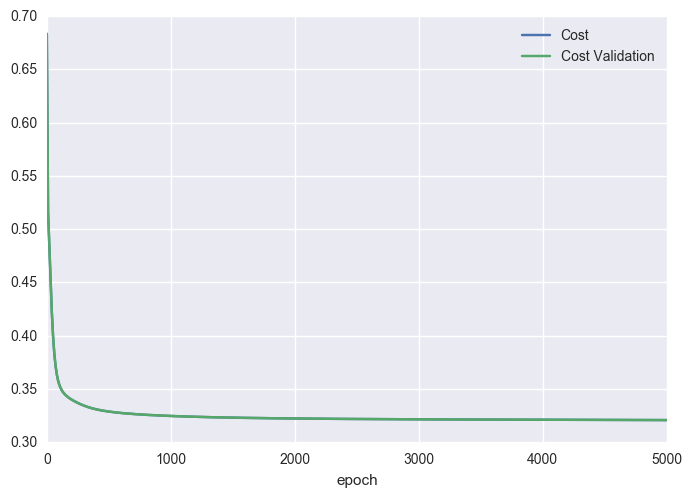

In [10]:
bc_ae2 = Autoencoder([9,2,9], training_set=breastcancer_data, validation_set=breastcancer_data)
bc_ae2.train(epochs=5000, eta=0.5, mu=0.5, minibatch_size=100, collect_stats_every_nth_epoch=10, verbose=True)
bc_ae2.plot_stats()

INFO (theano.gof.compilelock): Refreshing lock C:\Users\D059331\AppData\Local\Theano\compiledir_Windows-10-10.0.10586-SP0-Intel64_Family_6_Model_61_Stepping_4_GenuineIntel-3.5.2-64\lock_dir\lock


Starting training with initial training cost: 0.3208772758078592 and validation cost: 0.3208772758078592


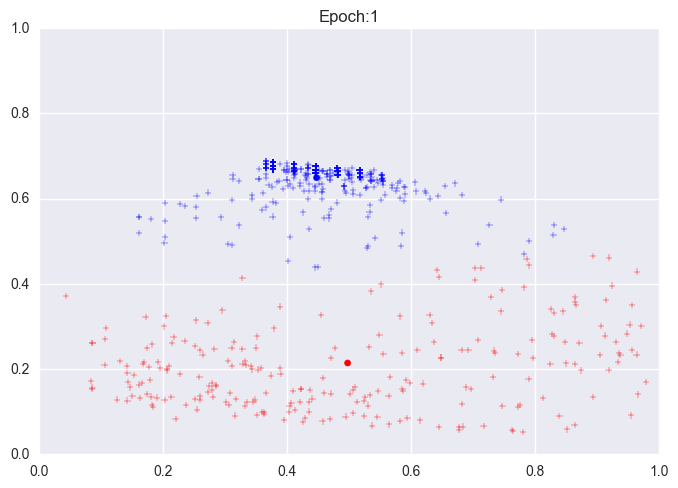

Epoch 10 Cost: 0.3478998538477589 Cost Validation: 0.32132745533841195
Validation set performance has been unchanged or decreasing for 15 epochs. Stopping training.
Training Time: 7.530890226364136 Per Epoch ~ 0.015061780452728272


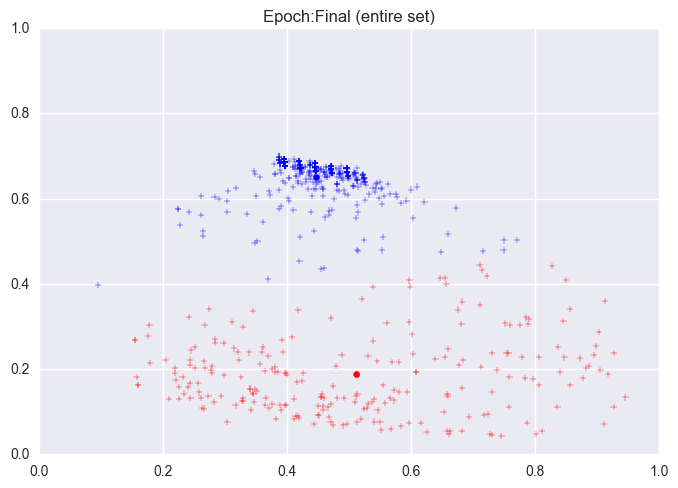

In [11]:
bc_ae2.cluster(q=1, k=2, epochs=500, eta=0.5, mu=0.5, minibatch_size=100, collect_stats_every_nth_epoch=10, verbose=True, plot_clusters_every_nth_epoch=100)

In [14]:
m1 = 'Pure K-Means'
kmeans_res = sklearn.cluster.KMeans(n_clusters=2, max_iter=1000, n_init=50).fit(breastcancer_data)
rating_kmeans = sklearn.metrics.adjusted_rand_score(breastcancer_data_target.values, kmeans_res.labels_)

m2 = 'Autoencoder-based clustering with clustering cost'
rating_aec = sklearn.metrics.adjusted_rand_score(breastcancer_data_target.values,bc_ae2.current_cluster_assignment.get_value())

m3 ='Autoencoder\'s hidden layer clustered with k-means'
#ae_kmeans_res = sklearn.cluster.KMeans(n_clusters=2, max_iter=1000, n_init=50).fit(bc_ae2.encode(breastcancer_data))
rating_ae_kmeans = rating_aec
#rating_ae_kmeans = sklearn.metrics.adjusted_rand_score(breastcancer_data_target.values, ae_kmeans_res.labels_)
pd.DataFrame([(rating_kmeans, m1),(rating_aec, m2),(rating_ae_kmeans, m3)], columns=['Adjusted Rand Score', 'Method'])

,Adjusted Rand Score,Method
0,0.846468,Pure K-Means
1,0.874092,Autoencoder-based clustering with clustering cost
2,0.874092,Autoencoder's hidden layer clustered with k-means
